<a href="https://colab.research.google.com/github/Yash1289/CoronaVirus_Tweet_Sentiment/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = "/content/drive/MyDrive/Coronavirus Tweets.csv"
corona_df = pd.read_csv(path , engine = "python")

In [5]:
corona_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [6]:
corona_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
corona_df["Location"] = corona_df["Location"].str.strip()
corona_df["Location"] = corona_df["Location"].str.capitalize()
corona_df["Location"] = corona_df["Location"].str.strip()

In [8]:
corona_df[corona_df["Location"] == "london"]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


In [9]:
def cityFinder(location):
  if isinstance(location, str):
    cityAndOthers = re.split(r"-|,|/", location)
    return cityAndOthers[0]
  else:
    return location

In [10]:
corona_df["Location"] = corona_df["Location"].apply(cityFinder)

In [11]:
corona_df[corona_df["Location"] == "London, England"]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


In [12]:
def SpamLocationRemover(location):
  if isinstance(location, str):
    clearLocation = re.sub("[^a-zA-Z\s]", "" , location)
    return clearLocation
  else:
    return location

In [13]:
corona_df["Location"] = corona_df["Location"].apply(SpamLocationRemover)

In [14]:
corona_df["Location"] = corona_df["Location"].str.strip()

In [15]:
corona_df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [16]:
def Sentiment_Grouping(sentiment):
  if sentiment == "Extremely Positive":
    return "Positive"
  elif sentiment == "Extremely Negative":
    return "Negative"
  else:
    return sentiment

In [17]:
corona_df["Sentiment"] = corona_df["Sentiment"].apply(Sentiment_Grouping)

In [18]:
corona_df["Sentiment"].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [19]:
sentiment_grouping = corona_df.groupby(["Location" , "Sentiment"]).agg({ "OriginalTweet" : "count"}).reset_index()
sentiment_pivot = sentiment_grouping.pivot(index = "Location" , columns="Sentiment" , values="OriginalTweet")
sentiment_pivot

Sentiment,Negative,Neutral,Positive
Location,,,
,158.0,87.0,153.0
A,NaN,1.0,1.0
A big gay world of my own,NaN,1.0,NaN
A blasted heath,NaN,1.0,NaN
A box,1.0,1.0,NaN
...,...,...,...
xcf,NaN,NaN,1.0
yonge st,2.0,2.0,2.0
yonge street,1.0,NaN,1.0


In [20]:
sentiment_pivot.fillna(0, inplace = True)
sentiment_pivot

Sentiment,Negative,Neutral,Positive
Location,,,
,158.0,87.0,153.0
A,0.0,1.0,1.0
A big gay world of my own,0.0,1.0,0.0
A blasted heath,0.0,1.0,0.0
A box,1.0,1.0,0.0
...,...,...,...
xcf,0.0,0.0,1.0
yonge st,2.0,2.0,2.0
yonge street,1.0,0.0,1.0


In [21]:
sentiment_pivot = sentiment_pivot.apply(lambda x: round(x*100/sum(x),2) if sum(x) > 10 else (x)*0, axis=1)
sentiment_pivot

Sentiment,Negative,Neutral,Positive
Location,,,
,39.7,21.86,38.44
A,0.0,0.00,0.00
A big gay world of my own,0.0,0.00,0.00
A blasted heath,0.0,0.00,0.00
A box,0.0,0.00,0.00
...,...,...,...
xcf,0.0,0.00,0.00
yonge st,0.0,0.00,0.00
yonge street,0.0,0.00,0.00


In [22]:
sentiment_pivot["SentimentDiff"] = sentiment_pivot["Positive"] - sentiment_pivot["Negative"]

In [23]:
sentiment_pivot

Sentiment,Negative,Neutral,Positive,SentimentDiff
Location,,,,
,39.7,21.86,38.44,-1.26
A,0.0,0.00,0.00,0.00
A big gay world of my own,0.0,0.00,0.00,0.00
A blasted heath,0.0,0.00,0.00,0.00
A box,0.0,0.00,0.00,0.00
...,...,...,...,...
xcf,0.0,0.00,0.00,0.00
yonge st,0.0,0.00,0.00,0.00
yonge street,0.0,0.00,0.00,0.00


In [24]:
sentimentBackup = sentiment_pivot.copy()

In [25]:
def Location_Cat(positivePercent):
  if positivePercent <= 55.0 and positivePercent >=45.0 :
    return 0
  elif positivePercent <= 70.0 and positivePercent >55.0 :
    return 1
  elif positivePercent <= 100.0 and positivePercent > 70 :
    return 2
  elif positivePercent < 45.0 and positivePercent >= 30 :
    return -1
  elif positivePercent < 30.0 and positivePercent >= 0 :
    return -2

In [26]:
def Location_Cat3(sRow) :
  if (sRow["Neutral"] >= sRow["Positive"] and sRow["Neutral"] >= sRow["Negative"]) or abs(sRow["SentimentDiff"]) <= 15:
    return 0
  elif sRow["SentimentDiff"] >30 :
    return 2
  elif sRow["SentimentDiff"] >10 :
    return 1
  elif sRow["SentimentDiff"] < -30:
    return -2
  elif sRow["SentimentDiff"] < -10:
    return -1

In [27]:
sentimentBackup = sentimentBackup.reset_index().rename_axis(None, axis=1)

In [28]:
sentimentBackup

,Location,Negative,Neutral,Positive,SentimentDiff
0,,39.7,21.86,38.44,-1.26
1,A,0.0,0.00,0.00,0.00
2,A big gay world of my own,0.0,0.00,0.00,0.00
3,A blasted heath,0.0,0.00,0.00,0.00
4,A box,0.0,0.00,0.00,0.00
...,...,...,...,...,...
8167,xcf,0.0,0.00,0.00,0.00
8168,yonge st,0.0,0.00,0.00,0.00
8169,yonge street,0.0,0.00,0.00,0.00
8170,yvr yyz yul,0.0,0.00,0.00,0.00


In [29]:
sentimentBackup["LocationCat"] = sentimentBackup.apply(Location_Cat3 , axis = 1)

In [30]:
sentimentBackup

,Location,Negative,Neutral,Positive,SentimentDiff,LocationCat
0,,39.7,21.86,38.44,-1.26,0
1,A,0.0,0.00,0.00,0.00,0
2,A big gay world of my own,0.0,0.00,0.00,0.00,0
3,A blasted heath,0.0,0.00,0.00,0.00,0
4,A box,0.0,0.00,0.00,0.00,0
...,...,...,...,...,...,...
8167,xcf,0.0,0.00,0.00,0.00,0
8168,yonge st,0.0,0.00,0.00,0.00,0
8169,yonge street,0.0,0.00,0.00,0.00,0
8170,yvr yyz yul,0.0,0.00,0.00,0.00,0


In [31]:
corona_new_df = pd.merge(corona_df , sentimentBackup , how = "left" , on = "Location")

In [32]:
corona_new_df.drop(columns = ["Negative" , "Positive" , "Neutral" , "SentimentDiff"] , axis = 1 , inplace = True)

In [33]:
corona_new_df["Location"].fillna("Unknown" , inplace = True)
corona_new_df["LocationCat"].fillna(0 , inplace = True)

In [34]:
corona_new_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0
1,3800,48752,Uk,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0.0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0.0
3,3802,48754,Unknown,16-03-2020,My food stock is not the only one which is emp...,Positive,0.0
4,3803,48755,Unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0.0
...,...,...,...,...,...,...,...
41152,44951,89903,Wellington city,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,0.0
41153,44952,89904,Unknown,14-04-2020,Response to complaint not provided citing COVI...,Negative,0.0
41154,44953,89905,Unknown,14-04-2020,You know its getting tough when @KameronWilds...,Positive,0.0
41155,44954,89906,Unknown,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,0.0


In [35]:
pd.DataFrame(corona_new_df.dtypes).rename(columns = {0:'dtype'})

,dtype
UserName,int64
ScreenName,int64
Location,object
TweetAt,object
OriginalTweet,object
Sentiment,object
LocationCat,float64


In [36]:
corona_new_df["TweetAt"] = pd.to_datetime(corona_new_df["TweetAt"])

In [37]:
corona_new_df["Month"] = corona_new_df["TweetAt"].apply(lambda x : x.month)
corona_new_df["Year"] = corona_new_df["TweetAt"].apply(lambda x : x.year)

In [38]:
corona_new_df["TweetAt"].max()

Timestamp('2020-12-04 00:00:00')

In [39]:
corona_new_df["TweetAt"].min()

Timestamp('2020-01-04 00:00:00')

In [40]:
corona_new_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat,Month,Year
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0,3,2020
1,3800,48752,Uk,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.0,3,2020
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.0,3,2020
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,0.0,3,2020
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,0.0,3,2020
...,...,...,...,...,...,...,...,...,...
41152,44951,89903,Wellington city,2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,0.0,4,2020
41153,44952,89904,Unknown,2020-04-14,Response to complaint not provided citing COVI...,Negative,0.0,4,2020
41154,44953,89905,Unknown,2020-04-14,You know its getting tough when @KameronWilds...,Positive,0.0,4,2020
41155,44954,89906,Unknown,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,0.0,4,2020


##**Text Cleaning Model Implementation**

In [41]:
corona_model_df = corona_new_df.copy()

In [42]:
from textblob import TextBlob, Word
!pip install contractions

In [43]:
def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    tweet = re.sub(r'\r+|\n+','',tweet)
    return tweet

In [44]:
corona_model_df["CleanedTweet"] = corona_model_df["OriginalTweet"].apply(remove_usernames_links)

In [45]:
def extract_hash_tags(s):
  return " ".join(part[1:] for part in s.split() if part.startswith('#'))

In [46]:
corona_model_df["hashtags"] = corona_model_df["CleanedTweet"].apply(extract_hash_tags)

In [47]:
def remove_spam(tweet):
    tweet = re.sub('[^a-zA-Z0-9\s]+','',tweet)
    tweet = re.sub('#[^\s]+', "", tweet)
    return tweet

In [48]:
corona_model_df["CleanedTweet"] = corona_model_df["CleanedTweet"].apply(remove_spam)

In [49]:
import contractions

def contractions_remover(text):
# creating an empty list
  expanded_words = []    
  for word in text.split():
    # using contractions.fix to expand the shotened words
    expanded_words.append(contractions.fix(word))   
      
  expanded_text = ' '.join(expanded_words)
  return expanded_text

In [50]:
corona_model_df["CleanedTweet"] = corona_model_df["CleanedTweet"].apply(contractions_remover)

In [51]:
corona_model_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat,Month,Year,CleanedTweet,hashtags
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0,3,2020,and and,
1,3800,48752,Uk,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.0,3,2020,advice Talk to your neighbours family to excha...,
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.0,3,2020,Coronavirus Australia Woolworths to give elder...,
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,0.0,3,2020,My food stock is not the only one which is emp...,COVID_19 COVID19 coronavirus confinement Confi...
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,0.0,3,2020,Me ready to go at supermarket during the COVID...,COVID19 coronavirus restezchezvous StayAtHome ...
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,Wellington city,2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,0.0,4,2020,Airline pilots offering to stock supermarket s...,NZ COVID-19
41153,44952,89904,Unknown,2020-04-14,Response to complaint not provided citing COVI...,Negative,0.0,4,2020,Response to complaint not provided citing COVI...,
41154,44953,89905,Unknown,2020-04-14,You know its getting tough when @KameronWilds...,Positive,0.0,4,2020,You know its getting tough when is rationing t...,coronavirus toiletpaper
41155,44954,89906,Unknown,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,0.0,4,2020,Is it wrong that the smell of hand sanitizer i...,COVID19 coronavirus


##**EDA Section**

In [140]:
from PIL import Image
import numpy as np
import requests

In [ ]:
corona_eda_df = corona_model_df.copy()

In [139]:
#Importing the seaborn and matplotlib library for our data visualization tasks
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Setting different parameters of matplotlib and seaborn for better visualization 
plt.rcParams['figure.figsize'] = 10,7
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')

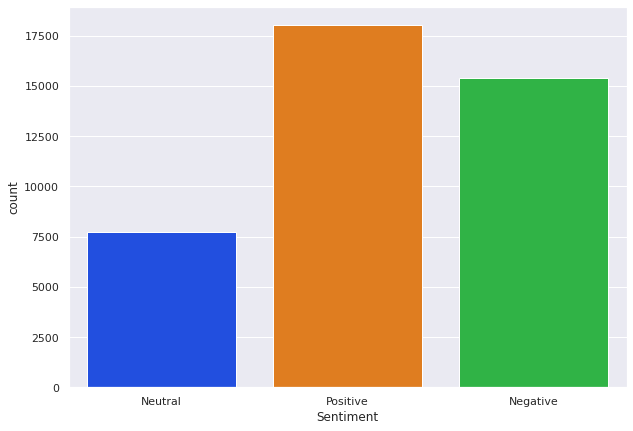

In [ ]:
sns.countplot(x="Sentiment", data=corona_eda_df, palette = "bright")

In [ ]:
def corona_wordcloud(tweetSentiment):
  # create text from all tweets
  all_words = ' '.join([text for text in neutral_tweets['CleanedTweet'] ])

  url = "https://gcdn.pbrd.co/images/6oqZ6NykLYii.png?o=1"

  img = Image.open(requests.get(url, stream=True).raw)

    
  # asarray() class is used to convert
  # PIL images into NumPy arrays
  virusMask = np.array(img)

  font_path = "/content/drive/MyDrive/Balivia.ttf"

  from wordcloud import WordCloud
  wordcloud = WordCloud(width=2000, height=1000, max_font_size=200, font_path = font_path,
                            background_color="white", max_words=2000, mask = virusMask, 
                            contour_width=1, contour_color="steelblue", 
                            colormap="nipy_spectral").generate(all_words)

  plt.figure(figsize=(13, 11))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

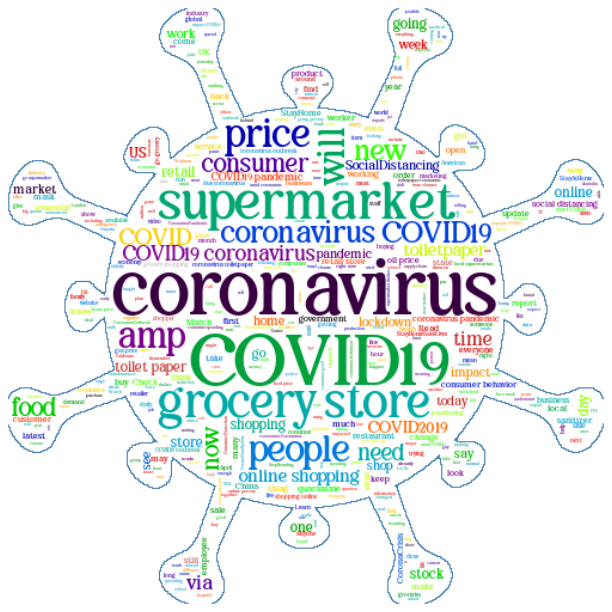

In [ ]:
neutral_tweets = corona_eda_df[corona_eda_df["Sentiment"] == "Neutral"]
corona_wordcloud(neutral_tweets)

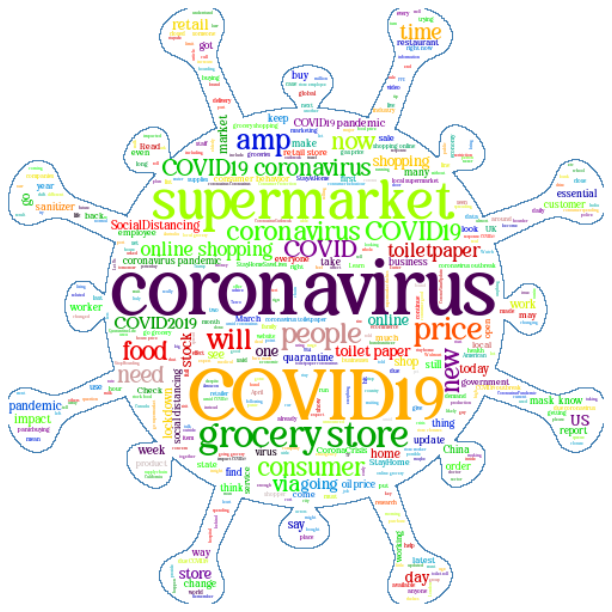

In [ ]:
positive_tweets = corona_eda_df[corona_eda_df["Sentiment"] == "Positive"]
corona_wordcloud(positive_tweets)

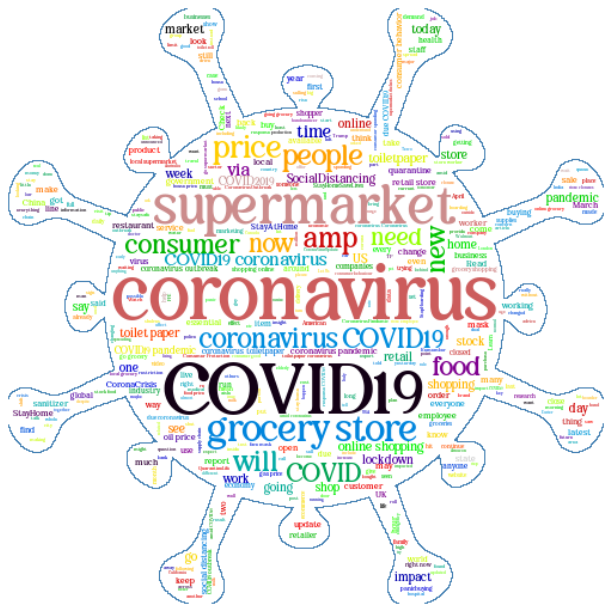

In [ ]:
negative_tweets = corona_eda_df[corona_eda_df["Sentiment"] == "Negative"]
corona_wordcloud(negative_tweets)

In [ ]:
def text_process(msg):
    whitelist = ["n't", "not", "no" , "nor" , "couldn't" , "wouldn't" ,"isn't" , "haven't" , "wasn't" , "didn't" , "hasn't" , "shouldn't" , "doesn't" , "weren't" ,
                 "aren't"]
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if (word.lower() not in stopwords.words('english') or word.lower() in whitelist)])

In [ ]:
corona_eda_df["tokenized_tweet"] = corona_eda_df["CleanedTweet"].apply(text_process)

In [ ]:
def vectorization(table):
    vector = CountVectorizer()

    frequency_matrix = vector.fit_transform(table.tokenized_tweet)
    sum_frequencies = np.sum(frequency_matrix, axis=0)

    frequency = np.squeeze(np.asarray(sum_frequencies))
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names_out()).transpose()
    return frequency_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

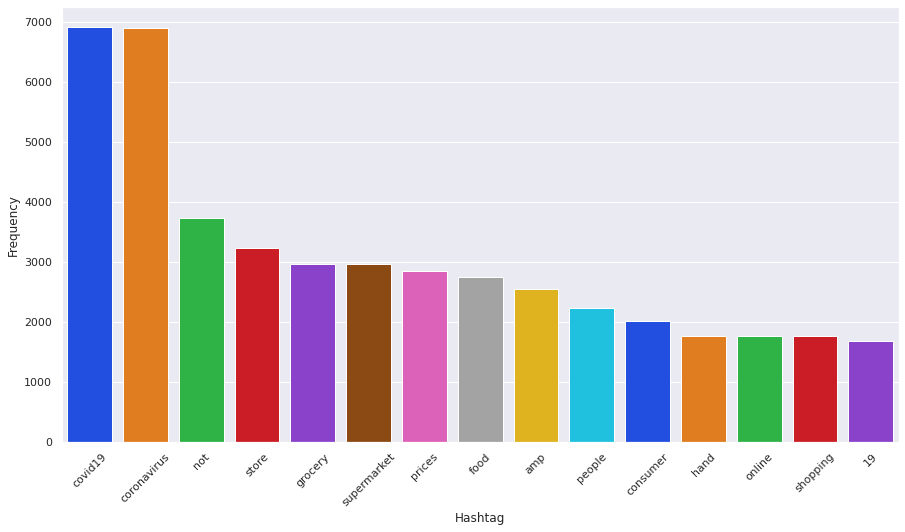

In [ ]:
Posfrequency_df = vectorization(corona_eda_df[corona_eda_df["Sentiment"] == "Positive"])
Posfrequency_df.reset_index( inplace = True)
Posfrequency_df.rename(columns = {'index': "Hashtag" , 0 : "Frequency"} , inplace = True)

Poshashtags = Posfrequency_df.sort_values(by = "Frequency" , ascending = False )[:15]

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Hashtag" , y ="Frequency" , data = Poshashtags , palette = "bright")

plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

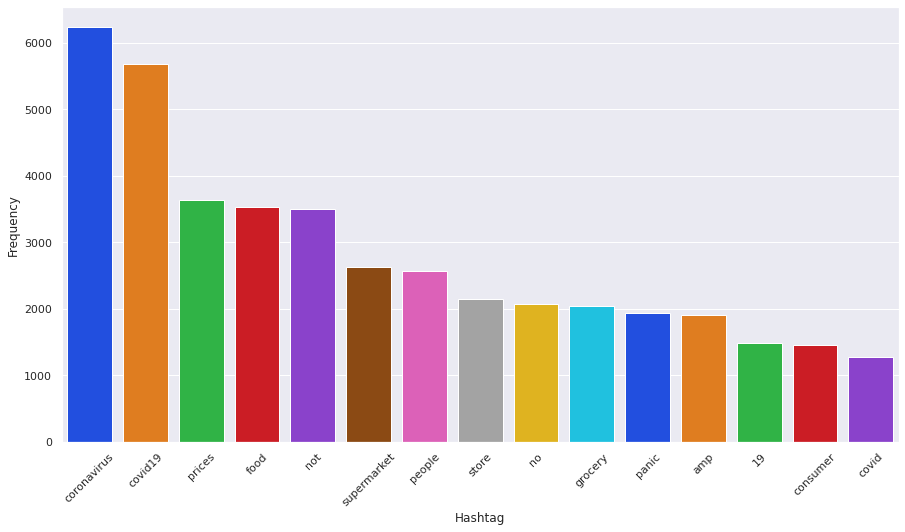

In [ ]:
Negfrequency_df = vectorization(corona_eda_df[corona_eda_df["Sentiment"] == "Negative"])
Negfrequency_df.reset_index( inplace = True)
Negfrequency_df.rename(columns = {'index': "Hashtag" , 0 : "Frequency"} , inplace = True)

Neghashtags = Negfrequency_df.sort_values(by = "Frequency" , ascending = False )[:15]
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Hashtag" , y ="Frequency" , data = Neghashtags , palette = "bright")
plt.xticks(rotation=45)

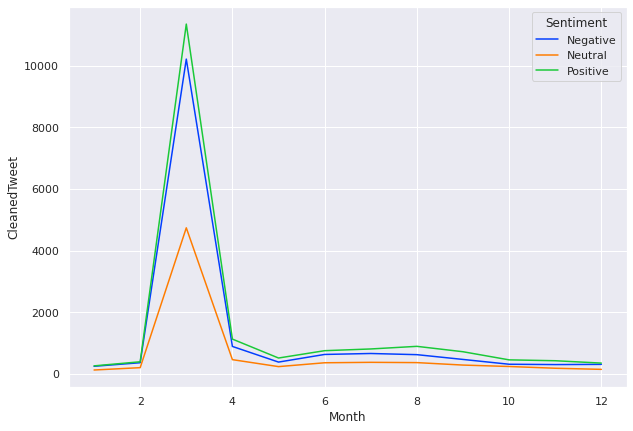

In [ ]:
monthSentiment_groupby = corona_eda_df.groupby(["Month" , "Sentiment"]).agg({ "CleanedTweet" : "count"}).reset_index()
sns.lineplot(x = "Month" , y ="CleanedTweet" , hue="Sentiment" ,  data = monthSentiment_groupby , palette = 'bright' )

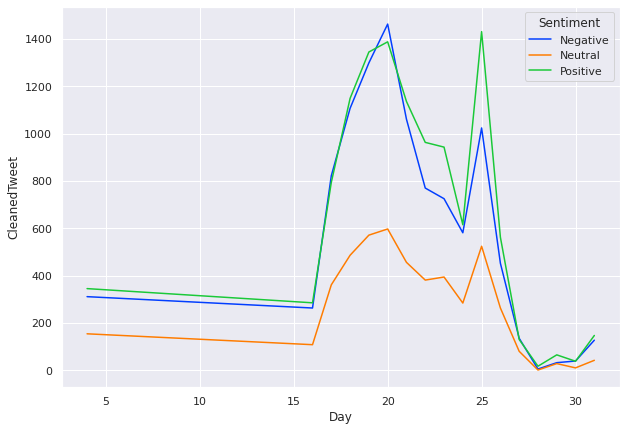

In [ ]:
corona_3rd_subset = corona_eda_df[corona_eda_df["Month"] == 3].copy()
corona_3rd_subset["Day"] = corona_3rd_subset["TweetAt"].apply(lambda x : x.day)

daySentiment_groupby = corona_3rd_subset.groupby(["Day" , "Sentiment"]).agg({ "CleanedTweet" : "count"}).reset_index()
sns.lineplot(x = "Day" , y ="CleanedTweet" , hue="Sentiment" ,  data = daySentiment_groupby , palette = 'bright' )

In [ ]:
sentiment_grouping22 = corona_df.groupby(["Location"] , sort = False ).agg({ "OriginalTweet" : "count"}).reset_index()
sorted = sentiment_grouping22.sort_values(by="OriginalTweet" , ascending = False)[0:5]
top_location = sorted["Location"].tolist()

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

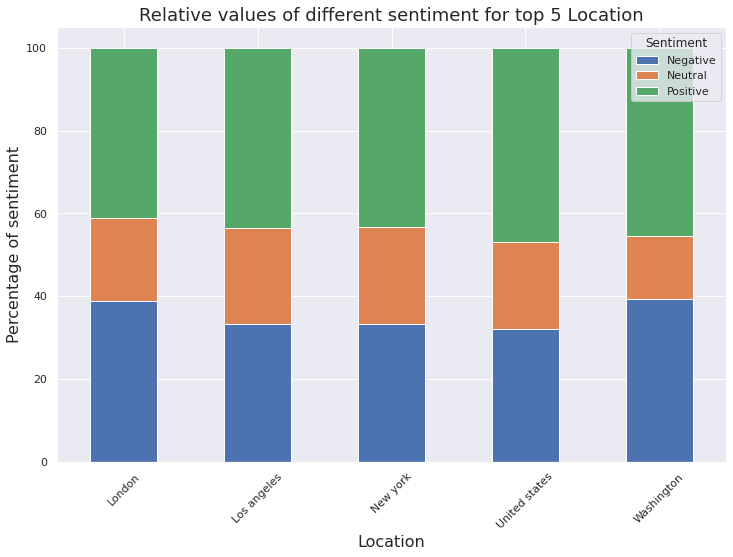

In [ ]:
sentiment_grouping = corona_df[corona_df["Location"].isin(top_location)].groupby(["Location" , "Sentiment"] , sort= False).agg({ "OriginalTweet" : "count"}).reset_index().sort_values(by = "OriginalTweet" , ascending = False)
sentiment_pivot = sentiment_grouping.pivot(index = "Location" , columns="Sentiment" , values="OriginalTweet")


#Changing the int values of sentiment to percent
top5_location_groupby_pivot = sentiment_pivot.apply(lambda x: x*100/sum(x) , axis=1)

#Plotting a bar chart to show the relative values of positive, negative and neutral reviews the top 5 most reviewed apps have received
top5_location_groupby_pivot.plot(kind="bar" ,stacked=True , figsize=(12,8))
plt.xlabel("Location" , fontsize = 16)
plt.ylabel("Percentage of sentiment" , fontsize =16)
plt.title("Relative values of different sentiment for top 5 Location" , fontsize =18)
plt.xticks(rotation=45)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Vectorization for Data Visualization
def vectorization(table):
    vector = CountVectorizer()

    frequency_matrix = vector.fit_transform(table.hashtags)
    sum_frequencies = np.sum(frequency_matrix, axis=0)

    frequency = np.squeeze(np.asarray(sum_frequencies))
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names_out()).transpose()
    return frequency_df

In [ ]:
frequency_df = vectorization(corona_eda_df)
frequency_df.reset_index( inplace = True)
frequency_df.rename(columns = {'index': "Hashtag" , 0 : "Frequency"} , inplace = True)


In [ ]:
hashtags = frequency_df.sort_values(by = "Frequency" , ascending = False )[:10]
import plotly.graph_objects as go

data = {
   "values": hashtags['Frequency'],
   "labels": hashtags["Hashtag"],
   "domain": {"column": 0},
   "name": "hashtags",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Relative Percentage of top 10 Hashtag</b>", legend=dict(x=0.9, y=0.8, orientation="v"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

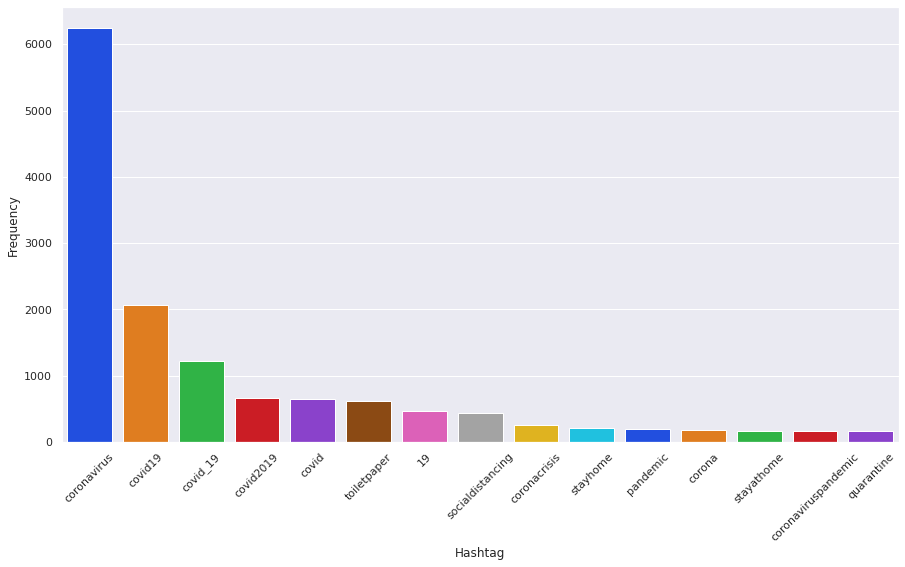

In [ ]:
Posfrequency_df = vectorization(corona_eda_df[corona_eda_df["Sentiment"] == "Positive"])
Posfrequency_df.reset_index( inplace = True)
Posfrequency_df.rename(columns = {'index': "Hashtag" , 0 : "Frequency"} , inplace = True)

Poshashtags = Posfrequency_df.sort_values(by = "Frequency" , ascending = False )[:15]

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Hashtag" , y ="Frequency" , data = Poshashtags , palette = "bright")

plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

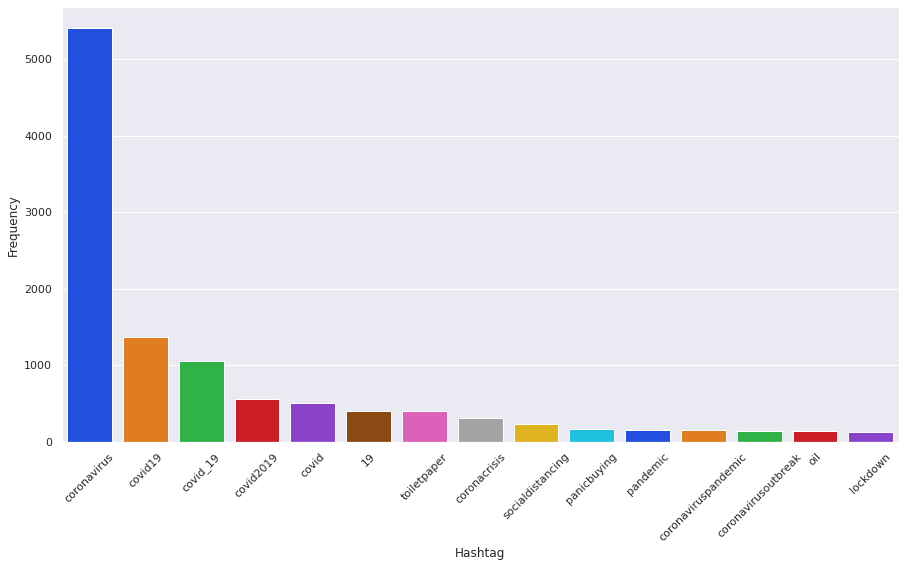

In [ ]:
Negfrequency_df = vectorization(corona_eda_df[corona_eda_df["Sentiment"] == "Negative"])
Negfrequency_df.reset_index( inplace = True)
Negfrequency_df.rename(columns = {'index': "Hashtag" , 0 : "Frequency"} , inplace = True)

Neghashtags = Negfrequency_df.sort_values(by = "Frequency" , ascending = False )[:15]
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Hashtag" , y ="Frequency" , data = Neghashtags , palette = "bright")
plt.xticks(rotation=45)

##**Tokenization**

In [52]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
import string
from nltk.corpus import stopwords

In [54]:
def text_process(msg):
    whitelist = ["n't", "not", "no" , "nor" , "couldn't" , "wouldn't" ,"isn't" , "haven't" , "wasn't" , "didn't" , "hasn't" , "shouldn't" , "doesn't" , "weren't" ,
                 "aren't"]
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if (word.lower() not in stopwords.words('english') or word.lower() in whitelist)])

In [55]:
corona_model_df['tokenized_tweet'] = corona_model_df['CleanedTweet'].apply(text_process)

##**Lemmatization**

In [56]:
nltk.download('wordnet')

from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk import pos_tag


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [57]:
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

In [58]:
corona_model_df["lemmatized_tweet"] = corona_model_df["tokenized_tweet"].apply(lemmatize_with_postag)

In [59]:
from nltk.stem import PorterStemmer

In [60]:
def stemming(input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)

In [61]:
corona_model_df["stemmed_tweet"] = corona_model_df["tokenized_tweet"].apply(lemmatize_with_postag)

##**Multinomial Classification**

In [62]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

In [63]:
corona_multi_df = corona_model_df.copy()

In [64]:
def Improved_cf(cf_matrix):

  group_names = [ "True Pos" ,"False Neutral" ,"False Neg" ,"False Pos","True Neutral" ,"False Neg","False Pos", "False Neutral" ,"True Neg"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(3,3)

  ax = sns.heatmap(cf_matrix , annot=labels, 
              fmt='', cmap='Blues')
  
  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(['1','0',"-1"])
  ax.yaxis.set_ticklabels(['1','0',"-1"])

In [65]:
#label encoding
encoders_nums = {"Sentiment":{"Positive":1,
                              "Neutral":0,
                              "Negative":-1,
                              }}        
corona_multi_df = corona_multi_df.replace(encoders_nums)

In [66]:
def elongated_words(sentiment_analysis):
  match_elongated = re.sub(r'(.)\1\1{1,}',r'\1', sentiment_analysis)
  return match_elongated

corona_multi_df["lemmatized_tweet"] = corona_multi_df["lemmatized_tweet"].apply(elongated_words)

In [67]:
corona_multi_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'LocationCat', 'Month', 'Year', 'CleanedTweet', 'hashtags',
       'tokenized_tweet', 'lemmatized_tweet', 'stemmed_tweet'],
      dtype='object')

In [68]:
corona_multi_df = corona_multi_df.drop(columns = ["UserName" , "ScreenName" , "Location" , "TweetAt" , "OriginalTweet" , "CleanedTweet" , "tokenized_tweet", "Year", "stemmed_tweet"] , axis = 1 )
corona_multi_df.columns

Index(['Sentiment', 'LocationCat', 'Month', 'hashtags', 'lemmatized_tweet'], dtype='object')

In [69]:
corona_multi_df["lemmatized_tweet"] = corona_multi_df["lemmatized_tweet"].str.lower()
corona_multi_df["hashtags"] = corona_multi_df["hashtags"].str.lower()

In [70]:
training_columns = list(set(corona_multi_df.columns) - {"Sentiment" , "stemmed_tweet"})
training_columns

['Month', 'hashtags', 'LocationCat', 'lemmatized_tweet']

In [71]:
X = corona_multi_df[training_columns]
Y = corona_multi_df["Sentiment"]

In [72]:
vectorizer1 = TfidfVectorizer(lowercase=True, max_df = 0.90 , max_features = 4500)
vectorizer2 = TfidfVectorizer(max_features = 2000)

In [73]:
vectorizer11 = CountVectorizer( )
vectorizer22 = CountVectorizer( )

In [74]:
column_transformer = ColumnTransformer(
      [('vec1', vectorizer11, 'lemmatized_tweet'), 
    ('vec2', vectorizer22, 'hashtags')],
    remainder='passthrough')

### **Logistic Regression**

In [82]:
from sklearn.metrics import accuracy_score

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 ,random_state=42)

In [235]:
log_model = LogisticRegression(solver= "newton-cg")

log_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', log_model)
                ])
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', LogisticRegression(solver='newton-cg'))])

In [236]:
log_pipe.score(X_train ,y_train)

0.9735155656795748

In [237]:
log_train_preds = log_pipe.predict(X_train)
log_test_preds = log_pipe.predict(X_test)

In [238]:
print(classification_report(y_train,log_train_preds))
print(classification_report(y_test,log_test_preds))

              precision    recall  f1-score   support

          -1       0.97      0.98      0.98     12336
           0       0.98      0.95      0.96      6160
           1       0.97      0.98      0.98     14429

    accuracy                           0.97     32925
   macro avg       0.97      0.97      0.97     32925
weighted avg       0.97      0.97      0.97     32925

              precision    recall  f1-score   support

          -1       0.82      0.80      0.81      3062
           0       0.71      0.72      0.71      1553
           1       0.83      0.84      0.83      3617

    accuracy                           0.80      8232
   macro avg       0.78      0.79      0.78      8232
weighted avg       0.80      0.80      0.80      8232



In [239]:
accuracy_score(y_test, log_test_preds)

0.8007774538386784

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=42)

In [241]:
log_grid_model = LogisticRegression()

log_grid_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', log_grid_model)
                ])

In [242]:
# HYperparameter Grid
param_dict = {'clf__C': [2.5,3,3.5],
              'clf__solver' : ["newton-cg"],
              'clf__max_iter':[50,150,350],
              "vec__vec1__ngram_range" : [(1,2),(1,3)],
              "vec__vec2__max_features" : [1000]
              }

kfold = StratifiedKFold(n_splits=2)

# Create an instance of the RandomForestRegressor
log_grid_model = GridSearchCV(log_grid_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

log_grid_model.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vec',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vec1',
                                                                         CountVectorizer(),
                                                                         'lemmatized_tweet'),
                                                                        ('vec2',
                                                                         CountVectorizer(),
                                                                         'hashtags')])),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [2.5, 3, 3.5],
                         'clf__max_iter': [50, 150, 350],
                         'clf__solver': ['newton-cg'],
                         'v

In [243]:
log_grid_model.best_params_

{'clf__C': 2.5,
 'clf__max_iter': 50,
 'clf__solver': 'newton-cg',
 'vec__vec1__ngram_range': (1, 2),
 'vec__vec2__max_features': 1000}

In [244]:
log_grid_model.score(X_train ,y_train)

0.9997570235383447

In [245]:
train_grid_preds = log_grid_model.predict(X_train)
test_grid_preds = log_grid_model.predict(X_test)

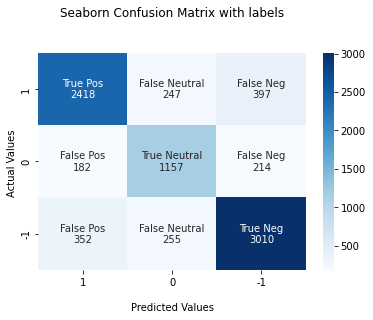

In [246]:
cf_matrix_log_grid = confusion_matrix(y_test, test_grid_preds)
Improved_cf(cf_matrix_log_grid)

In [247]:
print(classification_report(y_train,train_grid_preds))
print(classification_report(y_test,test_grid_preds))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     12336
           0       1.00      1.00      1.00      6160
           1       1.00      1.00      1.00     14429

    accuracy                           1.00     32925
   macro avg       1.00      1.00      1.00     32925
weighted avg       1.00      1.00      1.00     32925

              precision    recall  f1-score   support

          -1       0.82      0.79      0.80      3062
           0       0.70      0.75      0.72      1553
           1       0.83      0.83      0.83      3617

    accuracy                           0.80      8232
   macro avg       0.78      0.79      0.79      8232
weighted avg       0.80      0.80      0.80      8232



In [250]:
accuracy_score(y_test ,test_grid_preds )

0.7999271137026239

###**Support Vector Machine**

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [77]:
svm_model = LinearSVC(max_iter = 4500)

svc_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', svm_model)
                ])

svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', LinearSVC(max_iter=4500))])

In [78]:
svc_pipe.score(X_train ,y_train)

0.9942596810933941

In [79]:
svc_train_preds = svc_pipe.predict(X_train)
svc_test_preds = svc_pipe.predict(X_test)

In [80]:
print(classification_report(y_train,svc_train_preds))
print(classification_report(y_test,svc_test_preds))

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99     12336
           0       1.00      0.99      0.99      6160
           1       0.99      1.00      1.00     14429

    accuracy                           0.99     32925
   macro avg       0.99      0.99      0.99     32925
weighted avg       0.99      0.99      0.99     32925

              precision    recall  f1-score   support

          -1       0.80      0.79      0.80      3062
           0       0.67      0.69      0.68      1553
           1       0.82      0.83      0.82      3617

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



In [83]:
accuracy_score(y_test,svc_test_preds )

0.7860787172011662

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=42)

In [88]:
svc_grid_model = LinearSVC( )

svc_grid_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', svc_grid_model)
                ])

In [91]:
# HYperparameter Grid
param_dict = {'clf__C': [1,3,5],
              "clf__max_iter" : [8000,11000],
              "vec__vec1__ngram_range" : [(1,2),(1,3),(2,2)],
              "vec__vec2__max_features" : [1000]
              }

kfold = StratifiedKFold(n_splits=2)


# Create an instance of the RandomForestRegressor
svc_grid_model = GridSearchCV(svc_grid_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

svc_grid_model.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

KeyboardInterrupt: ignored

In [ ]:
svc_grid_model.score(X_train ,y_train)

In [ ]:
train_grid_preds = svc_grid_model.predict(X_train)
test_grid_preds = svc_grid_model.predict(X_test)

In [ ]:
cf_matrix_svc_grid = confusion_matrix(y_test, test_grid_preds)
Improved_cf(cf_matrix_svc_grid)

In [ ]:
print(classification_report(y_train,train_grid_preds))
print(classification_report(y_test,test_grid_preds))

###**Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
dec_model = DecisionTreeClassifier()

dec_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', dec_model)
                ])

dec_pipe.fit(X_train,y_train)

In [ ]:
dec_pipe.score(X_train ,y_train)

In [ ]:
train_preds = dec_pipe.predict(X_train)
test_preds = dec_pipe.predict(X_test)

In [ ]:
print(classification_report(y_train,train_preds))
print(classification_report(y_test,test_preds))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
model = DecisionTreeClassifier()

# Hyperparameter Grid
grid_values = {
    "clf_max_depth" : [ 12,14,15,16 ],
    "clf_min_samples_split" : [ 2,3,4],
    "clf_min_samples_leaf" : [1 , 2 ,4],
    "vec__vec1__ngram_range" : [(1,2),(1,3),(2,2)],
    "vec__vec2__max_features" : [1000 , 2000 , 3000]
}

kfold = StratifiedKFold(n_splits=2)


# Create an instance of the RandomForestRegressor
dec_grid_model = GridSearchCV(dec_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

dec_grid_model.fit(X_train, y_train)

In [ ]:
dec_grid_model.score(X_train ,y_train)

In [ ]:
train_grid_preds = dec_grid_model.predict(X_train)
test_grid_preds = dec_grid_model.predict(X_test)

In [ ]:
cf_matrix_dec_grid = confusion_matrix(y_test, test_grid_preds)
Improved_cf(cf_matrix_dec_grid)

In [ ]:
print(classification_report(y_train,train_grid_preds))
print(classification_report(y_test,test_grid_preds))

##**Binary Classification**

In [ ]:
corona_binary_df = corona_multi_df.copy()

In [ ]:
neutral_tweets = corona_binary_df[corona_model_df["Sentiment"] == 0].index
corona_binary_df.drop(neutral_tweets , inplace=True )

In [ ]:
X = corona_binary_df[training_columns]
Y = corona_binary_df["Sentiment"]

### **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
logistic_model = LogisticRegression(max_iter = 2000 , C = 2.5)

log_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', logistic_model)
                ])
log_pipe.fit(X_train,y_train)

In [ ]:
log_pipe.score(X_train ,y_train)

In [ ]:
train_preds = log_pipe.predict(X_train)
test_preds = log_pipe.predict(X_test)

In [ ]:
print(classification_report(y_train,train_preds))
print(classification_report(y_test,test_preds))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
# HYperparameter Grid
param_dict = {'clf__C': [2,2.5,3],
              "clf__max_iter" : [2000],
              "vec__vec1__ngram_range" : [(1,2),(1,3),(2,2)],
              "vec__vec2__max_features" : [1000 , 2000 , 3000]
              }

kfold = StratifiedKFold(n_splits=2)


# Create an instance of the RandomForestRegressor
log_grid_model = GridSearchCV(log_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

log_grid_model.fit(X_train, y_train)

In [ ]:
log_grid_model.score(X_train ,y_train)

In [ ]:
train_grid_preds = log_pipe.predict(X_train)
test_grid_preds = log_pipe.predict(X_test)

In [ ]:
cf_matrix_log_grid = confusion_matrix(y_test, test_grid_preds)
Improved_cf(cf_matrix_log_grid)

In [ ]:
print(classification_report(y_train,train_grid_preds))
print(classification_report(y_test,test_grid_preds))

###**SVM**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
svm_model = SVC( C = 5)

svc_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', svm_model)
                ])

svc_pipe.fit(X_train,y_train)

In [ ]:
svc_pipe.score(X_train ,y_train)

In [ ]:
train_preds = svc_pipe.predict(X_train)
test_preds = svc_pipe.predict(X_test)

In [ ]:
print(classification_report(y_train,train_preds))
print(classification_report(y_test,test_preds))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
# HYperparameter Grid
param_dict = {'clf__C': [4,5,6],
              "vec__vec1__ngram_range" : [(1,2),(1,3),(2,2)],
              "vec__vec2__max_features" : [1000 , 2000 , 3000]
              }

kfold = StratifiedKFold(n_splits=2)


# Create an instance of the RandomForestRegressor
svc_grid_model = GridSearchCV(svc_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

svc_grid_model.fit(X_train, y_train)

In [ ]:
svc_grid_model.score(X_train ,y_train)

In [ ]:
train_grid_preds = svc_grid_model.predict(X_train)
test_grid_preds = svc_grid_model.predict(X_test)

In [ ]:
cf_matrix_svc_grid = confusion_matrix(y_test, test_grid_preds)
Improved_cf(cf_matrix_svc_grid)

In [ ]:
print(classification_report(y_train,train_grid_preds))
print(classification_report(y_test,test_grid_preds))

###**Naive Bayes**

In [1]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
training_columns_naive = list(set(training_columns) - {"LocationCat"})

In [ ]:
X = corona_binary_df[training_columns_naive]
Y = corona_binary_df["Sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
naive_model = BernoulliNB( )

naive_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', naive_model)
                ])

naive_pipe.fit(X_train,y_train)

In [ ]:
naive_pipe.score(X_train ,y_train)

In [ ]:
train_preds = naive_pipe.predict(X_train)
test_preds = naive_pipe.predict(X_test)

In [ ]:
print(classification_report(y_train,train_preds))
print(classification_report(y_test,test_preds))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
# HYperparameter Grid
param_dict = {'clf__alpha': [0.5,1,2],
              "vec__vec1__ngram_range" : [(1,2),(1,3),(2,2)],
              "vec__vec2__max_features" : [1000 , 2000 , 3000]
              }

kfold = StratifiedKFold(n_splits=2)


# Create an instance of the RandomForestRegressor
naive_grid_model = GridSearchCV(naive_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

naive_grid_model.fit(X_train, y_train)

In [ ]:
naive_grid_model.score(X_train ,y_train)

In [ ]:
train_grid_preds = naive_grid_model.predict(X_train)
test_grid_preds = naive_grid_model.predict(X_test)

In [ ]:
cf_matrix_naive_grid = confusion_matrix(y_test, test_grid_preds)
Improved_cf(cf_matrix_naive_grid)

In [ ]:
print(classification_report(y_train,train_grid_preds))
print(classification_report(y_test,test_grid_preds))

##Leftovers

In [ ]:
pipe.score(X_train ,y_train)

0.9996051632498102

In [ ]:
rf_model.best_params_

{'clf__C': 5}

In [ ]:
train_preds = pipe.predict(X_train)

In [ ]:
test_preds_1 = rf_model.predict(X_test)

In [ ]:
test_preds = pipe.predict(X_test)

In [ ]:
test_preds2 = pipe2.predict(X_test)

In [ ]:
test_preds3 = pipe3.predict(X_test)

In [ ]:
print(classification_report(y_test,test_preds3))

              precision    recall  f1-score   support

          -1       0.76      0.79      0.78      3097
           0       0.72      0.51      0.60      1537
           1       0.76      0.83      0.80      3598

    accuracy                           0.76      8232
   macro avg       0.75      0.71      0.72      8232
weighted avg       0.76      0.76      0.75      8232



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.83      0.79      0.81      3155
           0       0.69      0.72      0.70      1531
           1       0.82      0.83      0.83      3546

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.81      0.80      0.80      2995
           0       0.67      0.73      0.70      1529
           1       0.84      0.82      0.83      3708

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.78      8232
weighted avg       0.80      0.79      0.80      8232



In [ ]:
print(classification_report(y_test,test_preds_1))

              precision    recall  f1-score   support

          -1       0.84      0.82      0.83      3089
           1       0.85      0.87      0.86      3600

    accuracy                           0.85      6689
   macro avg       0.85      0.84      0.84      6689
weighted avg       0.85      0.85      0.85      6689



In [ ]:
print(classification_report(y_test,test_preds3))

              precision    recall  f1-score   support

          -1       0.84      0.79      0.81      3089
           1       0.83      0.87      0.85      3600

    accuracy                           0.83      6689
   macro avg       0.83      0.83      0.83      6689
weighted avg       0.83      0.83      0.83      6689



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.86      0.85      0.86      3090
           1       0.87      0.89      0.88      3599

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.86      0.84      0.85      3130
           1       0.86      0.88      0.87      3559

    accuracy                           0.86      6689
   macro avg       0.86      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.86      0.85      0.85      3039
           1       0.87      0.89      0.88      3650

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.87      0.84      0.85      3136
           1       0.86      0.89      0.87      3553

    accuracy                           0.86      6689
   macro avg       0.87      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.86      0.83      0.84      3136
           1       0.86      0.88      0.87      3553

    accuracy                           0.86      6689
   macro avg       0.86      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.80      0.80      0.80      3095
           0       0.70      0.66      0.68      1495
           1       0.81      0.84      0.82      3642

    accuracy                           0.79      8232
   macro avg       0.77      0.76      0.77      8232
weighted avg       0.79      0.79      0.79      8232



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.88      0.83      0.85      3192
           1       0.85      0.89      0.87      3497

    accuracy                           0.86      6689
   macro avg       0.87      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



In [ ]:
accuracy_score(y_test,test_preds2)

0.8678427268650022

In [ ]:
accuracy_score(y_test,test_preds2)

0.793974732750243

In [ ]:
accuracy_score(y_test,test_preds2)

0.8647032441321573

In [ ]:
accuracy_score(y_test,test_preds_1)

0.845716848557333

In [ ]:
accuracy_score(y_test,test_preds3)

0.7581389698736638

In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.80      0.79      0.80      3016
           0       0.69      0.66      0.68      1540
           1       0.82      0.83      0.83      3676

    accuracy                           0.79      8232
   macro avg       0.77      0.76      0.77      8232
weighted avg       0.79      0.79      0.79      8232



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.79      0.80      0.79      3016
           0       0.70      0.65      0.67      1540
           1       0.81      0.84      0.82      3676

    accuracy                           0.79      8232
   macro avg       0.77      0.76      0.76      8232
weighted avg       0.78      0.79      0.78      8232



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.79      0.80      0.79      3016
           0       0.70      0.62      0.66      1540
           1       0.81      0.84      0.82      3676

    accuracy                           0.78      8232
   macro avg       0.77      0.75      0.76      8232
weighted avg       0.78      0.78      0.78      8232



In [ ]:
accuracy_score(y_test,test_preds2)

0.7855928085519922

In [ ]:
accuracy_score(y_test,test_preds2)

0.7874149659863946

In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.76      0.74      0.75      3016
           0       0.65      0.59      0.62      1540
           1       0.75      0.80      0.77      3676

    accuracy                           0.74      8232
   macro avg       0.72      0.71      0.71      8232
weighted avg       0.74      0.74      0.74      8232



In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.76      0.75      0.75      3090
           0       0.66      0.61      0.64      1562
           1       0.75      0.78      0.76      3580

    accuracy                           0.74      8232
   macro avg       0.72      0.71      0.72      8232
weighted avg       0.74      0.74      0.74      8232



In [ ]:
from sklearn.metrics import accuracy_score

#accuracy_score(y_test,test_preds)

In [ ]:
accuracy_score(y_test,test_preds)

0.7371234207968902

In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.76      0.73      0.74      3091
           0       0.64      0.57      0.60      1512
           1       0.74      0.80      0.77      3629

    accuracy                           0.73      8232
   macro avg       0.71      0.70      0.70      8232
weighted avg       0.73      0.73      0.73      8232



In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.75      0.73      0.74      3111
           0       0.65      0.59      0.62      1515
           1       0.74      0.79      0.77      3606

    accuracy                           0.73      8232
   macro avg       0.72      0.70      0.71      8232
weighted avg       0.73      0.73      0.73      8232



In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.76      0.74      0.75      3031
           0       0.64      0.59      0.61      1558
           1       0.75      0.79      0.77      3643

    accuracy                           0.73      8232
   macro avg       0.71      0.71      0.71      8232
weighted avg       0.73      0.73      0.73      8232



In [ ]:
from sklearn.naive_bayes import  GaussianNB

model1 = GaussianNB()

In [ ]:
class Densifier(object):
  def fit(self, X, y=None):
    pass
  def fit_transform(self, X, y=None):
    return self.transform(X)
  def transform(self, X, y=None):
    return X.toarray()

In [ ]:
pipe = Pipeline([ 
                 ('tfidf', column_transformer),
                 ('to_dense', Densifier()),
                  ('classify', model1)
                ])
pipe.fit(X_train ,y_train)

In [ ]:
sentiment_analysis = ["I awesoomee looovvveee this guy he is  " , "My friends is a muccch better dancer than he ever will be"]

In [ ]:
# Complete the regex to match an elongated word
regex_elongated = r"\w*(\w)\1\w*"

for tweet in sentiment_analysis:
  # Find if there is a match in each tweet 
  match_elongated = re.search(regex_elongated, tweet)
	if match_elongated:
		# Assign the captured group zero 
		elongated_word = match_elongated.group(0)
        
		# Complete the format method to print the word
		print("Elongated word found: {word}".format(word=elongated_word))
	else:
		print("No elongated word found")    

TabError: ignored

In [ ]:
# Complete the regex to match an elongated word
regex_elongated = r"\w*(\w)\1\w*"

for tweet in sentiment_analysis:
	# Find if there is a match in each tweet 
	match_elongated = re.search(regex_elongated, tweet)

	if match_elongated:
		# Assign the captured group zero 
		elongated_word = match_elongated.group(0)
        
		# Complete the format method to print the word
		print("Elongated word found: {word}".format(word=elongated_word))
	else:
		print("No elongated word found")     	

Elongated word found: awesoomee
Elongated word found: muccch


In [ ]:


for tweet in sentiment_analysis:
  match_elongated = re.sub(r'(.)\1\1{1,}',r'\1', tweet)
  print(match_elongated)
 

I awesoomee love this guy he is  
My friends is a much better dancer than he ever will be


In [ ]:
hello= "awesoomee"

In [ ]:
word = re.sub(r"(.)\1{1,}",r'\1', hello)

In [ ]:
word

'awesome'

In [ ]:
def elongated_words(sentiment_analysis):
  match_elongated = re.sub(r'(.)\1\1{1,}',r'\1', sentiment_analysis)
  return match_elongated

In [ ]:
print(elongated_words("hello i loveee you my friend"))

hello i love you my friend


In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 26.2 MB/s 
     |████████████████████████████████| 321 kB 51.4 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85433 sha256=49b60854509f15b56262464ee1483f7a9207e42c9fd3c8206206e43e1f17c9b7
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
# imports
from pycontractions import Contractions
cont = Contractions(kv_model=model)
cont.load_models()
# function to expand contractions
def expand_contractions(text):
    text = list(cont.expand_texts([text], precise=True))[0]
    return text

ModuleNotFoundError: ignored

## **Binary Classification**

In [ ]:
neutral_tweets = corona_final_df[corona_model_df["Sentiment"] == 0].index
corona_final_df.drop(neutral_tweets , inplace=True )